### This notebook compares the functional dependencies extracted using FDTool on of real and synthetic data 
- Select on which data you want to compare 
- functional dependency files are stored with .csv_logicDepTool.log extension
- For real data, files are stored in Real_simulated_data folder and for synthetic data, they are stored under respective model names
- Venn diagram gives the number of preserved functional dependencies (you can check for both with and without using HFGF)
- Files which have dependent_mapping at the end are the synthetic data genearted using HFGF and without are without using HFGF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib_venn import venn2


In [2]:
def file_reading(file_path):
    dependencies = set()
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting each line based on "->"
            parts = line.split("->")
            if len(parts) == 2:
                # Extracting dependencies from each part and adding curly brackets
                dependency1 = "{" + parts[0].strip().strip('"{}') + "}"
                dependency2 = "{" + parts[1].strip().strip('"{}') + "}"
                dependencies.add(dependency1 + " -> " + dependency2)
    return dependencies

In [3]:
real_dependency_list = file_reading(r'Real_simulated_data/test_check.csv_logicDepTool.log')
len(real_dependency_list)

7

In [4]:
ctgan_dependency_list = file_reading(r'Synthetic_data/ctgan/synthetic_ctgan_test_check_dependent_mapping.csv_logicDepTool.log')
len(ctgan_dependency_list)

9

In [5]:
ctabgan_plus_dependency_list = file_reading(r'Synthetic_data/ctabgan+/synthetic_ctabgan+_test_check_dependent_mapping.csv_logicDepTool.log')
len(ctabgan_plus_dependency_list)

10

In [6]:
tvae_dependency_list = file_reading(r'Synthetic_data/tvae/synthetic_tvae_test_check_dependent_mapping.csv_logicDepTool.log')
len(tvae_dependency_list)

11

In [7]:
nextconvgen_dependency_list = file_reading(r'Synthetic_data/nextconvgen/synthetic_nextconvgen_test_check_dependent_mapping.csv_logicDepTool.log')
len(nextconvgen_dependency_list)

9

In [8]:
tabula_dependency_list = file_reading(r'Synthetic_data/tabula/synthetic_tabula_test_check_dependent_mapping.csv_logicDepTool.log')
len(tabula_dependency_list)

7

In [9]:
great_dependency_list = file_reading(r'Synthetic_data/great/synthetic_great_test_check_dependent_mapping.csv_logicDepTool.log')
len(great_dependency_list)

10

In [10]:
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}


In [11]:
def FD_venn_diagram(real_dependency_list, synthetic_dependency_list):
    def f(x):
        l = list(set(x))
        l.sort()
        return tuple(l)
    
    real_set = set(tuple(map(f, dependency)) for dependency in real_dependency_list)
    synthetic_set = set(tuple(map(f, dependency)) for dependency in synthetic_dependency_list)

    common_count = len(real_set.intersection(synthetic_set))

    # Calculate the total number of unique elements for each set
    real_elements = len(real_set)
    synthetic_elements = len(synthetic_set)

    # Normalize circle sizes based on the maximum number of unique elements
    max_elements = max(real_elements, synthetic_elements)

    # Create the Venn diagram
    venn = venn2(
        subsets=(len(real_set) - common_count, len(synthetic_set) - common_count, common_count),
        set_labels=('Real', 'Synthetic'),
        normalize_to=1.0
    )

    # Set the colors for the labels to match the circles
    label_real = venn.get_label_by_id('A')
    label_synthetic = venn.get_label_by_id('B')

    label_real.set_color(venn.get_patch_by_id('10').get_facecolor())
    label_synthetic.set_color(venn.get_patch_by_id('01').get_facecolor())

    # Make the labels bold
    label_real.set_fontweight('bold')
    label_synthetic.set_fontweight('bold')

    # Add a title
    #plt.title("TabuLa")
    #plt.savefig('tabula_FD.png', dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

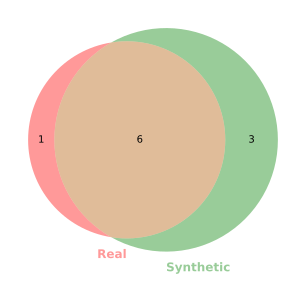

In [12]:
FD_venn_diagram(real_dependency_list, ctgan_dependency_list)

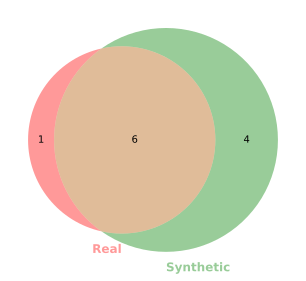

In [13]:
FD_venn_diagram(real_dependency_list, ctabgan_plus_dependency_list)

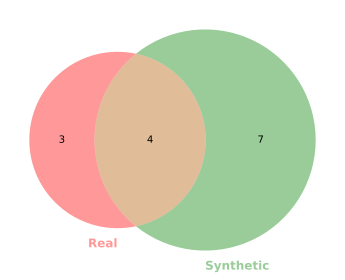

In [14]:
FD_venn_diagram(real_dependency_list, tvae_dependency_list)

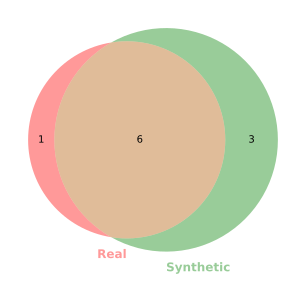

In [15]:
FD_venn_diagram(real_dependency_list, nextconvgen_dependency_list)

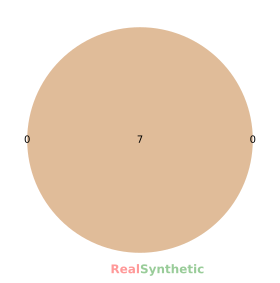

In [16]:
FD_venn_diagram(real_dependency_list, tabula_dependency_list)

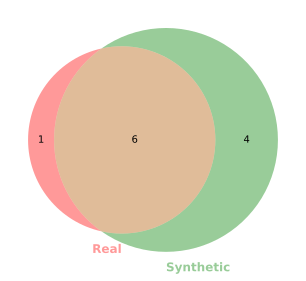

In [17]:
FD_venn_diagram(real_dependency_list, great_dependency_list)